# K Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
df = pd.read_csv("https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/Wholesale%20customers%20data.csv")
df.shape

(440, 8)

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

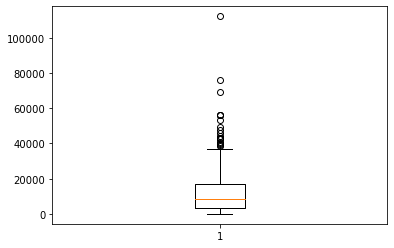

In [7]:
plt.boxplot(df.Fresh)
plt.show()

In [8]:
df[df.Fresh>df.Fresh.quantile(0.99)]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
39,1,3,56159,555,902,10002,212,2916
125,1,3,76237,3473,7102,16538,778,918
181,1,3,112151,29627,18148,16745,4948,8550
258,1,1,56083,4563,2124,6422,730,3321
284,1,3,68951,4411,12609,8692,751,2406


In [12]:
df.Fresh[df.Fresh>=df.Fresh.quantile(0.97)] = df.Fresh.quantile(0.965)
df.Milk[df.Milk>=df.Milk.quantile(0.96)] = df.Milk.quantile(0.955)
df.skew()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Channel              0.760951
Region              -1.283627
Fresh                1.212321
Milk                 1.432967
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

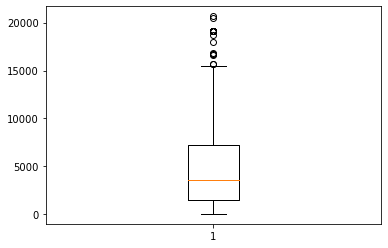

In [13]:
plt.boxplot(df.Milk)
plt.show()

In [14]:
df2 = df[['Fresh','Milk']]

## Applying Clustering

In [15]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=5)

In [16]:
# train the model
model.fit(df2)

KMeans(n_clusters=3, random_state=5)

In [17]:
# analyse the cluster center
pd.DataFrame(model.cluster_centers_,columns=df2.columns)

,Fresh,Milk
0,15267.278571,3533.399286
1,4110.719008,5930.685537
2,33056.774090,6423.351724


C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


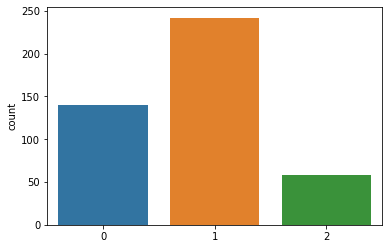

In [18]:
sns.countplot(model.labels_)
plt.show()

In [20]:
df2['cluster']=model.predict(df2)
df2.head(8)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Fresh,Milk,cluster
0,12669.0,9656.0,0
1,7057.0,9810.0,1
2,6353.0,8808.0,1
3,13265.0,1196.0,0
4,22615.0,5410.0,0
5,9413.0,8259.0,1
6,12126.0,3199.0,0
7,7579.0,4956.0,1


## Clustering for more features

In [21]:
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                1.212321
Milk                 1.432967
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
cluster              0.196039
dtype: float64

In [22]:
df.Grocery[df.Grocery>=df.Grocery.quantile(0.96)] = df.Grocery.quantile(0.955)
df.Frozen[df.Frozen>=df.Frozen.quantile(0.95)] = df.Frozen.quantile(0.945)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                1.212321
Milk                 1.432967
Grocery              1.273843
Frozen               1.394906
Detergents_Paper     3.631851
Delicassen          11.151586
cluster              0.196039
dtype: float64

In [24]:
df3 = df[['Fresh','Milk','Grocery','Frozen']]

## Applying Clustering

In [25]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=5)

In [26]:
# train the model
model.fit(df3)

KMeans(n_clusters=3, random_state=5)

In [27]:
# analyse the cluster center
pd.DataFrame(model.cluster_centers_,columns=df3.columns)

,Fresh,Milk,Grocery,Frozen
0,5152.742268,10874.151546,17378.054433,1542.557784
1,7912.042969,3090.304687,3769.644531,2510.718535
2,29013.872382,5247.649425,6574.151264,4289.876552


C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


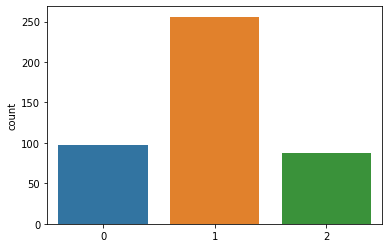

In [28]:
sns.countplot(model.labels_)
plt.show()

## Elbow Method

In [29]:
k = []
inertia = []
for i in range(1,10):
    model = KMeans(n_clusters=i,random_state=5)
    model.fit(df3)
    k.append(i)
    inertia.append(model.inertia_)
    

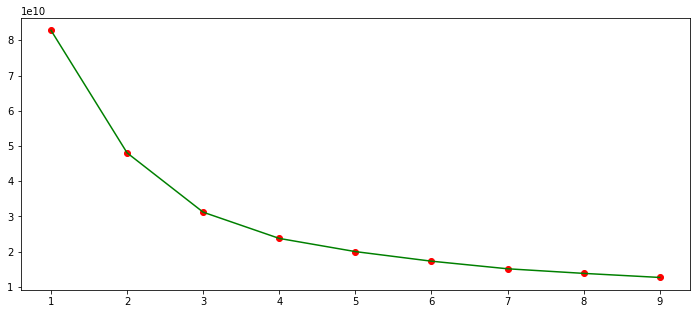

In [30]:
plt.figure(figsize=(12,5))
plt.scatter(k,inertia,c='r')
plt.plot(k,inertia,c='g')
plt.show()